<a href="https://colab.research.google.com/github/israelalex2323-perez/IA-013-PEREZ-REMIGIO-ISRAEL-ALEXANDER-2007050/blob/main/ACTIVIDADES/%22AF8_RNC%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#INTELIGENCIA ARTIFICIAL 013 N4 - N6
#AF8 REDES NEURONALES CONVOLUCIONALES
#NOMBRES                    MATRICULA         CARRERA
#ISRAEL ALEXANDER PÉREZ REMIGIO  2007050       IMC
#CARMEN BELÉN CONTRERAS VÁZQUEZ 2173848        IMC
#FÁTIMA QUETZALI RODRÍGUEZ REYNA 1958057       IMC

In [2]:
# CARGA DE LIBRERÍAS NECESARIAS
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#CARGA DE DATOS
#Cargando el conjunto de datos MNISTdesde keras
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
#Mostrar la forma de los conjuntos
print("Tamaño del conjunto de entrenamiento:", train_images.shape)
print("Tamaño del conjunto de prueba:", test_images.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Tamaño del conjunto de entrenamiento: (60000, 28, 28)
Tamaño del conjunto de prueba: (10000, 28, 28)


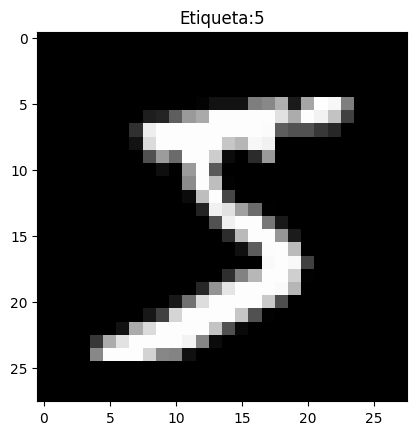

In [4]:
#PREPROCESAMIENTO DE DATOS
#las imagenes originales son de 28x28 pixeles en escaa de grises
#agregamos una dimensión de canal (necesaria para red convolucional)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

#Nromalizar los valores de pixel (0-255) a (0-1)
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

#Mostrar una imagen de ejemplo
plt.imshow(train_images[0].reshape((28, 28)), cmap='gray')
plt.title(f"Etiqueta:{train_labels[0]}")
plt.show()

In [5]:
#SELECCION Y ENTRENAMIENTO DEL MODELO
# Definición del modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 clases (0-9)
])

# Mostrar resumen del modelo
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
#COMPILACION DEL MODELO
# Compilar el modelo
model.compile(optimizer='adam',                 # Optimizador
    loss='sparse_categorical_crossentropy',  # Función de pérdida
    metrics=['accuracy']              # Métrica de desempeño
)

In [7]:
#ENTRENAIENTO DEL MODELO
# Entrenar el modelo con 5 épocas (puedes ajustar este valor)
history = model.fit(
    train_images, train_labels,
    epochs=5,
    validation_split=0.1,  # 10% para validación
    batch_size=64,
    verbose=1
)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 52s 59ms/step - accuracy: 0.8860 - loss: 0.3756 - val_accuracy: 0.9838 - val_loss: 0.0555
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 57ms/step - accuracy: 0.9847 - loss: 0.0501 - val_accuracy: 0.9877 - val_loss: 0.0403
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9902 - loss: 0.0329 - val_accuracy: 0.9895 - val_loss: 0.0352
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 55ms/step - accuracy: 0.9927 - loss: 0.0231 - val_accuracy: 0.9888 - val_loss: 0.0441
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 57ms/step - accuracy: 0.9944 - loss: 0.0180 - val_accuracy: 0.9895 - val_loss: 0.0396


In [8]:
#EVALUACION DEL MODELO
# Evaluar el modelo con los datos de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nExactitud del modelo en datos de prueba: {test_acc:.4f}")

313/313 - 3s - 9ms/step - accuracy: 0.9884 - loss: 0.0335

Exactitud del modelo en datos de prueba: 0.9884


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


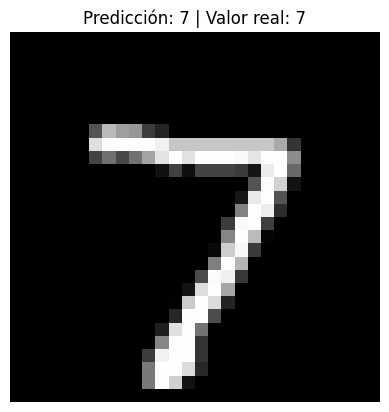

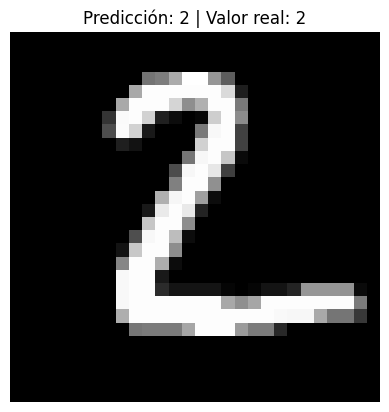

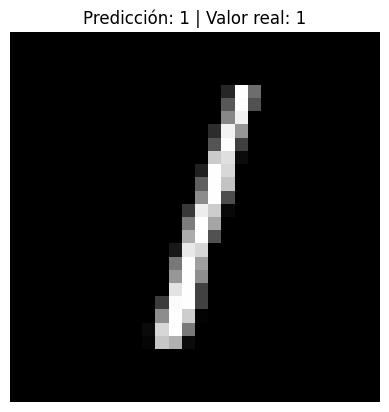

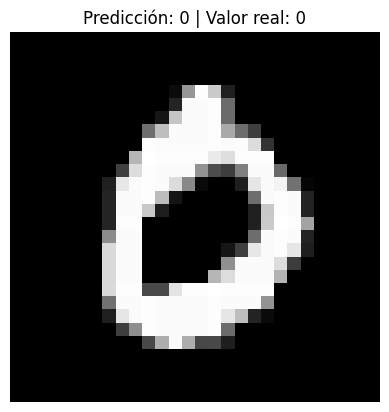

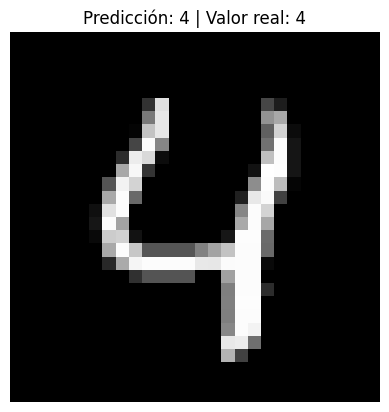

In [9]:
#PREDICCIONES CON EL CONJUNTO DE PRUEBA
# Realizar predicciones sobre los datos de prueba
predictions = model.predict(test_images)

# Mostrar 5 predicciones y su valor real
for i in range(5):
    plt.imshow(test_images[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicción: {np.argmax(predictions[i])} | Valor real: {test_labels[i]}")
    plt.axis('off')
    plt.show()

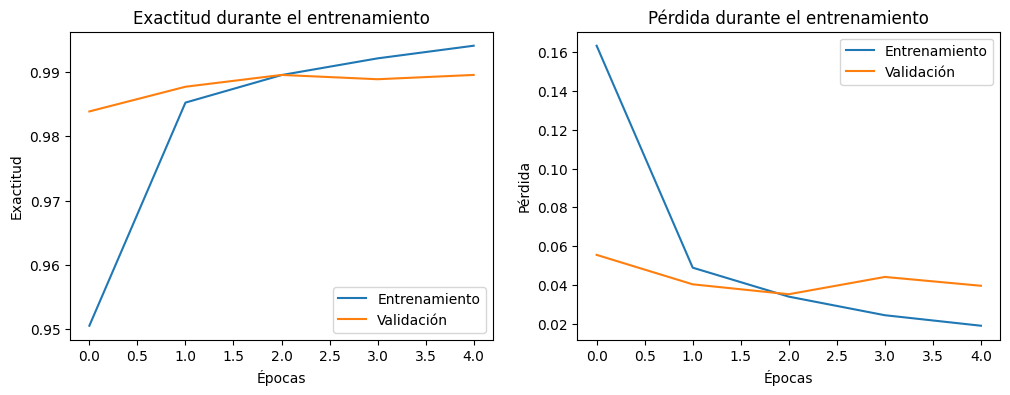

In [10]:
#VISUALIZAR EL PROCESO DE ENTRENAMIENTO
# Graficar la evolución de la precisión y pérdida
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Exactitud durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()